## ***KMeans Clustering in Image Classification for Skin Cancer Detection***

---






In [ ]:
'''
Classification with Clustering
1. Data Acquisition
2. Clustering for Image Segmentation (Preprocessing)
3. Cluster similar images together (Classification):
    a. Clustering Segmented Image
    b. Clustering Original Image

Validation with CNN
1. Train test split
    a. Segmented Image
    b. Original Image

2. Training (Classification)
    a. ...
    b. ...
'''

Data Acquisition

---

- [Dataset](https://www.kaggle.com/datasets/bhaveshmittal/melanoma-cancer-dataset)

- Data used is only 100 images per class

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import cv2
from google.colab.patches import cv2_imshow

benign_path = '/content/drive/MyDrive/Colab Notebooks/ML/Final Project Clustering/skincancer/benign'
malignant_path = '/content/drive/MyDrive/Colab Notebooks/ML/Final Project Clustering/skincancer/malignant'

print(len(os.listdir(benign_path)))
print(len(os.listdir(malignant_path)))

100
100


Show sample images

---



Benign Image:


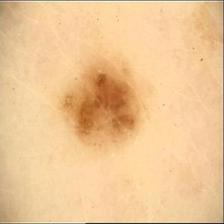

Malignant Image:


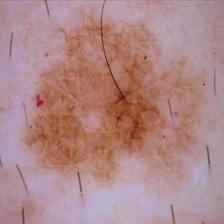

In [ ]:
# fetch the files
benign_files = os.listdir(benign_path)
malignant_files = os.listdir(malignant_path)

# join the path with the files
benign_image_path = os.path.join(benign_path, benign_files[97])
malignant_image_path = os.path.join(malignant_path, malignant_files[1])

# read the image
benign_image = cv2.imread(benign_image_path)
malignant_image = cv2.imread(malignant_image_path)

# show
print("Benign Image:")
cv2_imshow(benign_image)

print("Malignant Image:")
cv2_imshow(malignant_image)

Manual KMeans Function

---



In [ ]:
def self_kmeans(X, n_clusters, max_iter=100, tol=1e-4, random_state=42):
    # Initialize centroids randomly
    np.random.seed(random_state)
    centroids = X[np.random.choice(X.shape[0], n_clusters, replace=False)]

    for _ in range(max_iter):
        # Assign data points to the nearest centroid
        distances = np.sqrt(((X[:, np.newaxis] - centroids) ** 2).sum(axis=-1))
        labels = np.argmin(distances, axis=1)

        # Update the centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(n_clusters)])

        # Check for convergence
        if np.max(np.abs(new_centroids - centroids)) < tol:
            break

        centroids = new_centroids

    return labels, centroids

Example Output

---



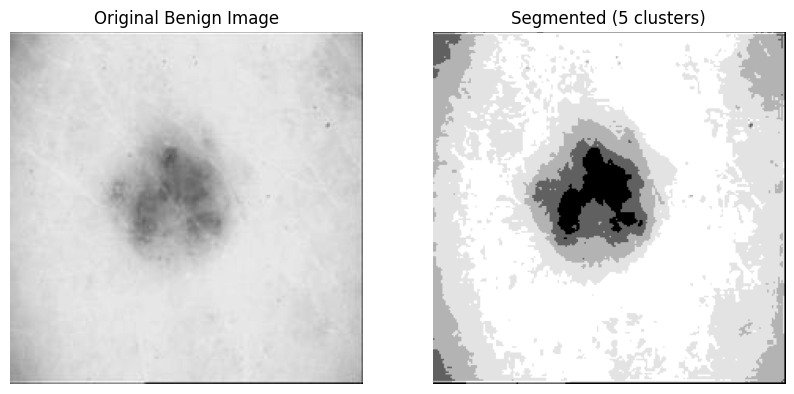

In [ ]:
# assume X contains the image data
benign_image_gray = cv2.cvtColor(benign_image, cv2.COLOR_BGR2GRAY)
malignant_image_gray = cv2.cvtColor(malignant_image, cv2.COLOR_BGR2GRAY)

# perform manual K-Means clustering with 4 clusters
labels, centroids = self_kmeans(benign_image_gray.reshape(-1, 1), n_clusters=5)

# reshape the clustered image data
segmented_image_data = centroids[labels].reshape(benign_image_gray.shape)

# convert the clustered image data back to an image
segmented_image = segmented_image_data.astype(np.uint8)

# display the original and segmented images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(benign_image_gray, cmap='gray')
plt.title('Original Benign Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmented (5 clusters)')
plt.axis('off')
plt.show()

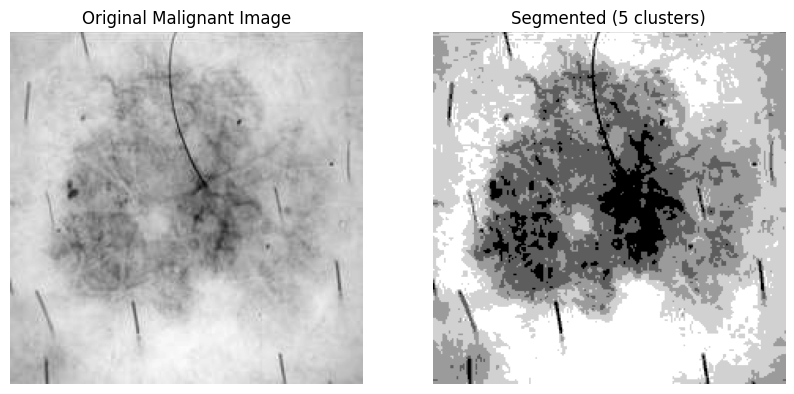

In [ ]:
# perform manual K-Means clustering with 4 clusters
labels, centroids = self_kmeans(malignant_image_gray.reshape(-1, 1), n_clusters=5)

# reshape the clustered image data
segmented_image_data = centroids[labels].reshape(malignant_image_gray.shape)

# convert the clustered image data back to an image
segmented_image = segmented_image_data.astype(np.uint8)

# display the original and segmented images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(malignant_image_gray, cmap='gray')
plt.title('Original Malignant Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(segmented_image, cmap='gray')
plt.title('Segmented (5 clusters)')
plt.axis('off')
plt.show()

Finding Optimal Clusters

---

- Elbow Method
- Silhouette Score


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

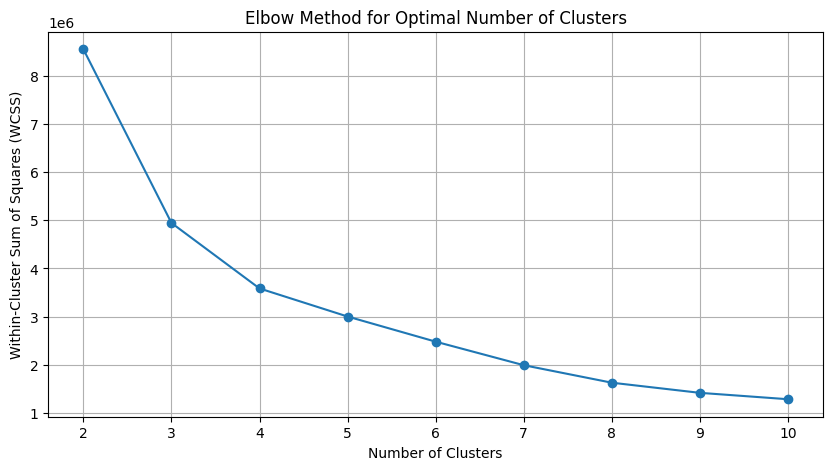

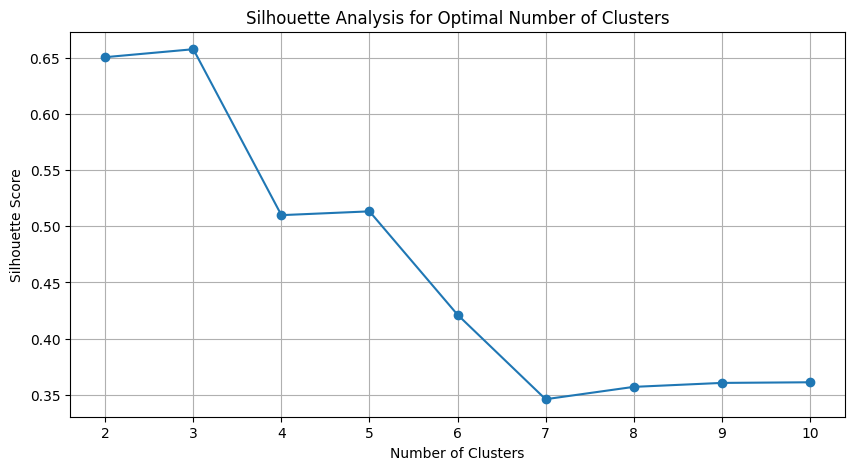

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# initialize lists to store WCSS and silhouette scores
wcss = []
silhouette_scores = []

# define range of clusters to test
clusters_range = range(2, 11)

# iterate over the range of clusters
for n_clusters in clusters_range:
    # fit k-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(benign_image_gray)

    # compute WCSS
    wcss.append(kmeans.inertia_)

    # compute silhouette score
    silhouette_scores.append(silhouette_score(benign_image_gray, kmeans.labels_))

# plot WCSS vs. number of clusters
plt.figure(figsize=(10, 5))
plt.plot(clusters_range, wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(clusters_range)
plt.grid(True)
plt.show()

# plot silhouette scores vs. number of clusters
plt.figure(figsize=(10, 5))
plt.plot(clusters_range, silhouette_scores, marker='o')
plt.title('Silhouette Analysis for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.xticks(clusters_range)
plt.grid(True)
plt.show()

Preprocessing

---

- Perform image segmentation using KMeans

In [ ]:
# iterate over directory and perform KMeans using optimal cluster
def apply_kmeans_to_directory(input_dir, output_dir, n_clusters):
    # create output directory if it doesn't exist
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)

    # iterate over images in the input directory
    for filename in os.listdir(input_dir):
        # read the image
        image_path = os.path.join(input_dir, filename)
        image = cv2.imread(image_path)
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        # perform KMeans clustering
        labels, centroids = self_kmeans(gray_image.reshape(-1, 1), n_clusters=n_clusters)

        # reshape the clustered image data
        segmented_image_data = centroids[labels].reshape(gray_image.shape)

        # convert the segmented image data back to an image
        segmented_image = segmented_image_data.astype(np.uint8)

        # save the original and segmented images to the output directory
        cv2.imwrite(os.path.join(output_dir, f'segmented_{filename}'), segmented_image)

# output paths
benign_segmented_path = '/content/drive/MyDrive/Colab Notebooks/ML/Final Project Clustering/skincancer/ben_segmented'
malignant_segmented_path = '/content/drive/MyDrive/Colab Notebooks/ML/Final Project Clustering/skincancer/mal_segmented'

# usage
clus = 5
apply_kmeans_to_directory(benign_path, benign_segmented_path, n_clusters=clus)
apply_kmeans_to_directory(malignant_path, malignant_segmented_path, n_clusters=clus)

<ipython-input-3-59cdaddbb320>:12: RuntimeWarning: Mean of empty slice.
  new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(n_clusters)])
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(


In [ ]:
print(len(os.listdir(benign_path)))
print(len(os.listdir(malignant_path)))

print(len(os.listdir(benign_segmented_path)))
print(len(os.listdir(malignant_segmented_path)))

100
100
100
100


Feature Extraction

---



In [ ]:
from keras.applications.resnet50 import preprocess_input
from keras.preprocessing import image
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Input

# load pretrained model
base_model = MobileNetV2(weights = 'imagenet', include_top = False, input_shape = (224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

def extract_vector(data_holder):
    mob_feature_list = []
    for im in data_holder:
        im = image.img_to_array(im)
        img = preprocess_input(np.expand_dims(im.copy(), axis=0))
        mob_feature = base_model.predict(img)
        mob_feature_np = np.array(mob_feature)
        mob_feature_list.append(mob_feature_np.flatten())
    return np.array(mob_feature_list)

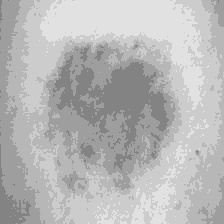

In [ ]:
test = os.listdir(benign_segmented_path)
check = cv2.imread(os.path.join(benign_segmented_path, test[0]))
cv2_imshow(check)

In [ ]:
from PIL import Image

def load_images_from_folder(folder_path):
    images = []
    for filename in os.listdir(folder_path):
        img = Image.open(os.path.join(folder_path, filename))
        img = img.convert('RGB')
        if img is not None:
            images.append(img)
    return images

# load segmented images
benign_images = load_images_from_folder(benign_segmented_path)
malignant_images = load_images_from_folder(malignant_segmented_path)

# extract features from the loaded images
benign_feature = extract_vector(benign_images)
malignant_feature = extract_vector(malignant_images)

1/1 [==============================] - 0s 24ms/step


In [ ]:
# Load segmented images
benign_images2 = load_images_from_folder(benign_path)
malignant_images2 = load_images_from_folder(malignant_path)

# Extract features from the loaded images
benign_feature2 = extract_vector(benign_images2)
malignant_feature2 = extract_vector(malignant_images2)

1/1 [==============================] - 0s 22ms/step


In [ ]:
print(f'benign features represented in numpy array: {benign_feature}')
print(f'malignant features represented in numpy array: {malignant_feature}')

benign features represented in numpy array: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
malignant features represented in numpy array: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
print(f'benign features (ori) represented in numpy array: {benign_feature2}')
print(f'malignant features (ori) represented in numpy array: {malignant_feature2}')

benign features (ori) represented in numpy array: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
malignant features (ori) represented in numpy array: [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


Final Clustering, grouping similar images together

---



<Axes: title={'center': 'Benign Segmented'}, xlabel='PC1', ylabel='PC2'>

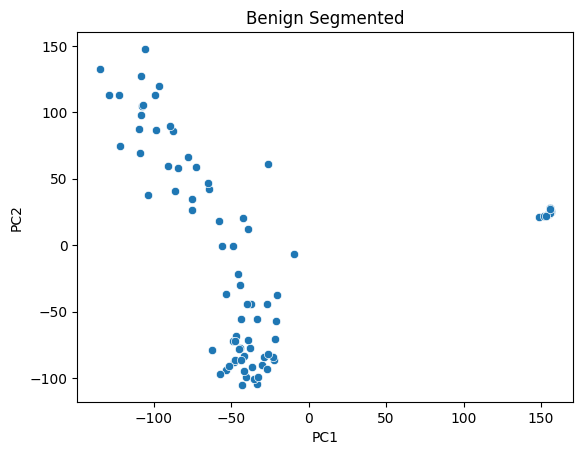

In [ ]:
from sklearn.decomposition import PCA

# Perform PCA to reduce dimensionality
pca = PCA(n_components=2)
benign_pca = pca.fit_transform(benign_feature)

df = pd.DataFrame(benign_pca, columns=['PC1', 'PC2'])

# Plot using seaborn
plt.title('Benign Segmented')
sns.scatterplot(data=df, x='PC1', y='PC2')

<Axes: title={'center': 'Malignant Segmented'}, xlabel='PC1', ylabel='PC2'>

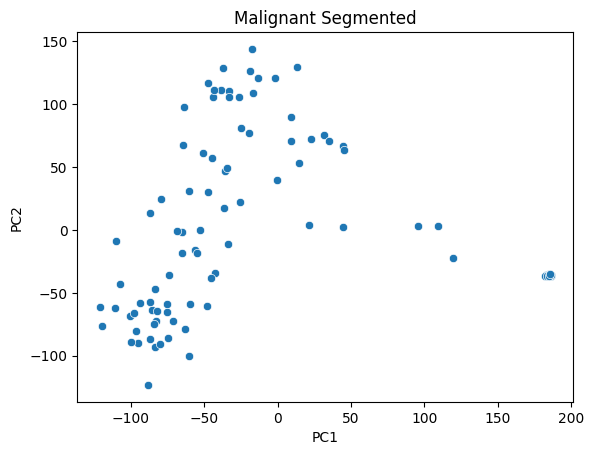

In [ ]:
# Perform PCA to reduce dimensionality
pca = PCA(n_components=2)
malignant_pca = pca.fit_transform(malignant_feature)

df = pd.DataFrame(malignant_pca, columns=['PC1', 'PC2'])

# Plot using seaborn
plt.title('Malignant Segmented')
sns.scatterplot(data=df, x='PC1', y='PC2')

<Axes: title={'center': 'Benign Original'}, xlabel='PC1', ylabel='PC2'>

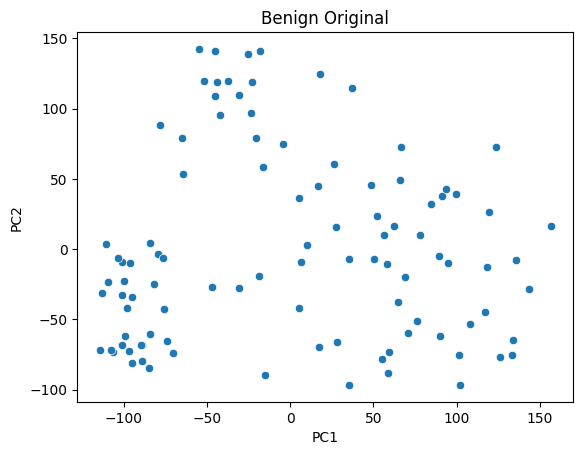

In [ ]:
# Perform PCA to reduce dimensionality
pca = PCA(n_components=2)
benign_pca2 = pca.fit_transform(benign_feature2)

df = pd.DataFrame(benign_pca2, columns=['PC1', 'PC2'])

# Plot using seaborn
plt.title('Benign Original')
sns.scatterplot(data=df, x='PC1', y='PC2')

<Axes: title={'center': 'Malignant Original'}, xlabel='PC1', ylabel='PC2'>

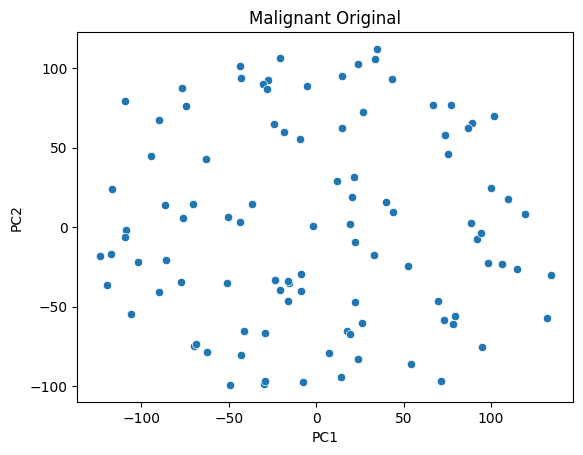

In [ ]:
# Perform PCA to reduce dimensionality
pca = PCA(n_components=2)
malignant_pca2 = pca.fit_transform(malignant_feature2)

df = pd.DataFrame(malignant_pca2, columns=['PC1', 'PC2'])

# Plot using seaborn
plt.title('Malignant Original')
sns.scatterplot(data=df, x='PC1', y='PC2')

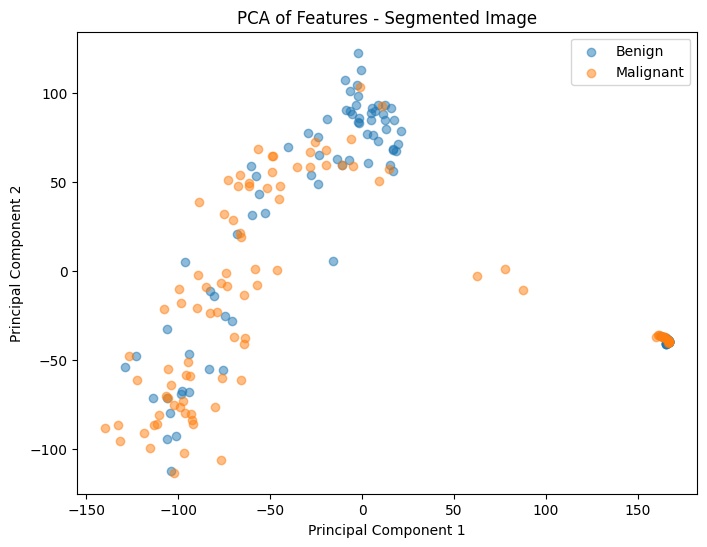

In [ ]:
# Concatenate benign and malignant features
all_features = np.concatenate((benign_feature, malignant_feature), axis=0)

# Perform PCA to reduce dimensionality
pca = PCA(n_components=2)
pca_result = pca.fit_transform(all_features)

# Split PCA results back into benign and malignant features
benign_pca = pca_result[:len(benign_feature)]
malignant_pca = pca_result[len(malignant_feature):]

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(benign_pca[:, 0], benign_pca[:, 1], label='Benign', alpha=0.5)
plt.scatter(malignant_pca[:, 0], malignant_pca[:, 1], label='Malignant', alpha=0.5)
plt.title('PCA of Features - Segmented Image')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

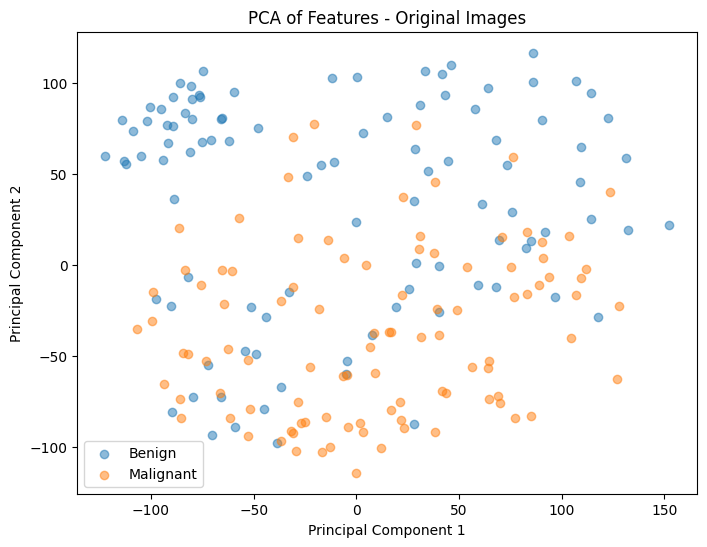

In [ ]:
# Concatenate benign and malignant features
all_features = np.concatenate((benign_feature2, malignant_feature2), axis=0)

# Perform PCA to reduce dimensionality
pca = PCA(n_components=2)
pca_result = pca.fit_transform(all_features)

# Split PCA results back into benign and malignant features
benign_pca2 = pca_result[:len(benign_feature2)]
malignant_pca2 = pca_result[len(malignant_feature2):]

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(benign_pca2[:, 0], benign_pca2[:, 1], label='Benign', alpha=0.5)
plt.scatter(malignant_pca2[:, 0], malignant_pca2[:, 1], label='Malignant', alpha=0.5)
plt.title('PCA of Features - Original Images')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

In [ ]:
def manual_silhouette_score(X, labels):
    n_samples = len(X)
    silhouette_values = np.zeros(n_samples)

    # Compute pairwise distances between samples
    distances = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            distances[i, j] = np.linalg.norm(X[i] - X[j])

    for i in range(n_samples):
        # Compute average distance to other samples in the same cluster (a_i)
        cluster_label = labels[i]
        cluster_indices = np.where(labels == cluster_label)[0]
        a_i = np.mean(distances[i, cluster_indices])

        # Compute average distance to samples in other clusters (b_i)
        b_i = np.min([np.mean(distances[i, np.where(labels == other_label)[0]]) for other_label in np.unique(labels) if other_label != cluster_label])

        # Compute silhouette value for sample i
        silhouette_values[i] = (b_i - a_i) / max(a_i, b_i)

    # Compute mean silhouette score
    silhouette_score = np.mean(silhouette_values)
    return silhouette_score


def purity_score(y_true, y_pred):
    # Convert labels to integers
    y_true_int = np.asarray(y_true, dtype=int)
    y_pred_int = np.asarray(y_pred, dtype=int)

    # Compute contingency matrix
    contingency_matrix = np.zeros((len(np.unique(y_true_int)), len(np.unique(y_pred_int))))
    for i, j in zip(y_true_int, y_pred_int):
        contingency_matrix[i, j] += 1

    # Compute purity
    purity = np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix)

    return purity

# Combine features and corresponding labels
all_features = np.concatenate([benign_feature, malignant_feature])
all_labels = np.concatenate([np.zeros(len(benign_feature)), np.ones(len(malignant_feature))])

# Perform self-implemented KMeans clustering
cluster_labels, cluster_centers = self_kmeans(all_features, n_clusters=2)

# Compute silhouette score
silhouette = manual_silhouette_score(all_features, cluster_labels)

# Compute purity
purity = purity_score(all_labels, cluster_labels)

print(f'''
SEGMENTED IMAGES CLUSTER
------------------------
Cluster Purity: {purity}
Silhouette Score: {silhouette}
      ''')


SEGMENTED IMAGES CLUSTER
------------------------
Cluster Purity: 0.695
Silhouette Score: 0.18745571071172815
      


In [ ]:
# Combine features and corresponding labels
all_features = np.concatenate([benign_feature2, malignant_feature2])
all_labels = np.concatenate([np.zeros(len(benign_feature2)), np.ones(len(malignant_feature2))])

# Perform self-implemented KMeans clustering
cluster_labels, cluster_centers = self_kmeans(all_features, n_clusters=2)

# Compute silhouette score
silhouette = manual_silhouette_score(all_features, cluster_labels)

# Compute purity
purity = purity_score(all_labels, cluster_labels)

print(f'''
ORIGINAL IMAGES CLUSTER
------------------------
Cluster Purity: {purity}
Silhouette Score: {silhouette}
      ''')


ORIGINAL IMAGES CLUSTER
------------------------
Cluster Purity: 0.715
Silhouette Score: 0.05392040312123485
      


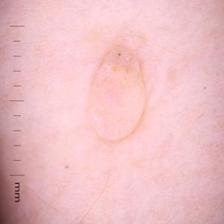


  Actual Label: Benign
  Cluster Label: 0
  


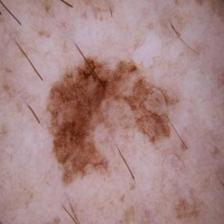


  Actual Label: Malignant
  Cluster Label: 1
  


In [ ]:
def load_and_display_image(image_path):
    # Load the image
    image = cv2.imread(image_path)
    # Display the image
    cv2_imshow(image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    return image


# Find the index of the first image in each cluster
first_benign_index = np.where(cluster_labels == 0)[0][0]
first_malignant_index = np.where(cluster_labels == 1)[0][0]

# Get the filenames corresponding to the first images in each cluster
first_benign_filename = benign_files[first_benign_index]
first_malignant_filename = malignant_files[first_malignant_index]

# Load and display the images
first_benign_image = load_and_display_image(os.path.join(benign_path, first_benign_filename))
print(
  f'''
  Actual Label: Benign
  Cluster Label: {cluster_labels[first_benign_index]}
  '''
)

first_malignant_image = load_and_display_image(os.path.join(malignant_path, first_malignant_filename))
print(
  f'''
  Actual Label: Malignant
  Cluster Label: {cluster_labels[first_malignant_index]}
  '''
)

### ***Validation with CNN***

---



In [ ]:
# 1. train test split on original images and segmented images
# 2. train and validate
# 3. compare evaluation results
'''
paths:
1. benign_path
2. benign_segmented_path
3. malignant_path
4. malignant_segmented_path
'''
def load_images(directory_path):
    images = []
    for filename in os.listdir(directory_path):
        if filename.endswith(".jpg") or filename.endswith(".png"):
            image_path = os.path.join(directory_path, filename)
            image = cv2.imread(image_path)
            image = cv2.resize(image, (224, 224))
            images.append(image)
    return images

benign_images = load_images(benign_path)
malignant_images = load_images(malignant_path)
benign_segmented_images = load_images(benign_segmented_path)
malignant_segmented_images = load_images(malignant_segmented_path)

# Combine original and segmented images
X_original = np.concatenate((benign_images, malignant_images))
X_segmented = np.concatenate((benign_segmented_images, malignant_segmented_images))

# Create labels
y_original = np.concatenate((np.zeros(len(benign_images)), np.ones(len(malignant_images))))
y_segmented = np.concatenate((np.zeros(len(benign_segmented_images)), np.ones(len(malignant_segmented_images))))

In [ ]:
print(len(X_original))
print(len(X_segmented))

print(len(y_original))
print(len(y_segmented))

200
200
200
200


In [ ]:
X_original[0].shape

(224, 224, 3)

In [ ]:
y_original.shape

(200,)

In [ ]:
from sklearn.model_selection import train_test_split

# Split into train and test sets
x_train_original, x_test_original, y_train_original, y_test_original = train_test_split(X_original, y_original, test_size=0.2, random_state=42)
x_train_segmented, x_test_segmented, y_train_segmented, y_test_segmented = train_test_split(X_segmented, y_segmented, test_size=0.2, random_state=42)

print(f'x train ori: {len(x_train_original)}, x test ori: {len(x_test_original)}, y train ori: {len(y_train_original)}, y test ori: {len(y_test_original)}')
print(f'x train segmented: {len(x_train_segmented)}, x test segmented: {len(x_test_segmented)}, y train segmented: {len(y_train_segmented)}, y test segmented: {len(y_test_segmented)}')

x train ori: 160, x test ori: 40, y train ori: 160, y test ori: 40
x train segmented: 160, x test segmented: 40, y train segmented: 160, y test segmented: 40


In [ ]:
# model's architecture
import tensorflow as tf
from tensorflow.keras.layers import Dense, BatchNormalization, Flatten

model = tf.keras.models.Sequential([
    base_model,
    BatchNormalization(),
    Flatten(),
    Dense(512, activation = 'relu'),
    Dense(1, activation='sigmoid')
])

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 batch_normalization_12 (Ba  (None, 7, 7, 1280)        5120      
 tchNormalization)                                               
                                                                 
 flatten_12 (Flatten)        (None, 62720)             0         
                                                                 
 dense_24 (Dense)            (None, 512)               32113152  
                                                                 
 dense_25 (Dense)            (None, 1)                 513       
                                                                 
Total params: 34376769 (131.14 MB)
Trainable params: 

In [ ]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.optimizers.Adam(),
    metrics = ['accuracy']
)

In [ ]:
y_train_original_reshaped = np.expand_dims(y_train_original, axis=-1)
y_test_original_reshaped = np.expand_dims(y_test_original, axis=-1)

ori = model.fit(
    x_train_original, y_train_original_reshaped,
    epochs = 30,
    validation_data = (x_test_original, y_test_original_reshaped),
    verbose = 2
)

Epoch 1/30
5/5 - 5s - loss: 10.4585 - accuracy: 0.6438 - val_loss: 3.3604 - val_accuracy: 0.8750 - 5s/epoch - 1s/step
Epoch 2/30
5/5 - 0s - loss: 3.1219 - accuracy: 0.8625 - val_loss: 12.0918 - val_accuracy: 0.6000 - 348ms/epoch - 70ms/step
Epoch 3/30
5/5 - 0s - loss: 1.0095 - accuracy: 0.9250 - val_loss: 6.6939 - val_accuracy: 0.7250 - 293ms/epoch - 59ms/step
Epoch 4/30
5/5 - 0s - loss: 1.2124 - accuracy: 0.9500 - val_loss: 3.4807 - val_accuracy: 0.8500 - 305ms/epoch - 61ms/step
Epoch 5/30
5/5 - 0s - loss: 0.3500 - accuracy: 0.9875 - val_loss: 6.4859 - val_accuracy: 0.7750 - 295ms/epoch - 59ms/step
Epoch 6/30
5/5 - 0s - loss: 0.1330 - accuracy: 0.9812 - val_loss: 7.6428 - val_accuracy: 0.7250 - 296ms/epoch - 59ms/step
Epoch 7/30
5/5 - 0s - loss: 0.2700 - accuracy: 0.9812 - val_loss: 3.6506 - val_accuracy: 0.8000 - 307ms/epoch - 61ms/step
Epoch 8/30
5/5 - 0s - loss: 4.7721e-06 - accuracy: 1.0000 - val_loss: 2.2610 - val_accuracy: 0.9000 - 408ms/epoch - 82ms/step
Epoch 9/30
5/5 - 0s - l

2/2 [==============================] - 1s 42ms/step
Performance on original images - Loss: 1.7294304370880127, Accuracy: 0.828125
Confusion Matrix:


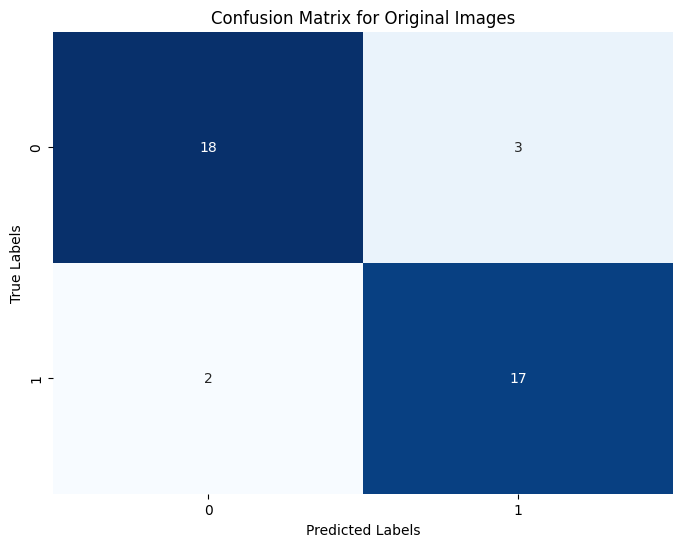

In [ ]:
from sklearn.metrics import confusion_matrix

# Evaluate performance on original images
loss_original, accuracy_original = model.evaluate(x_test_original, y_test_original)

# Predict labels for original images
y_pred_original = model.predict(x_test_original)
y_pred_original_binary = (y_pred_original > 0.5).astype(int)  # Convert probabilities to binary predictions

# Compute confusion matrix
conf_matrix_original = confusion_matrix(y_test_original, y_pred_original_binary)

# Compare performance
print(f"Performance on original images - Loss: {loss_original}, Accuracy: {accuracy_original}")
print("Confusion Matrix:")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_original, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Original Images")
plt.show()

In [ ]:
y_train_segmented_reshaped = np.expand_dims(y_train_segmented, axis=-1)
y_test_segmented_reshaped = np.expand_dims(y_test_segmented, axis=-1)

seg = model.fit(
    x_train_segmented, y_train_segmented_reshaped,
    epochs = 30,
    validation_data = (x_test_segmented, y_test_segmented_reshaped),
    verbose = 2
)

Epoch 1/30
5/5 - 0s - loss: 5.1732 - accuracy: 0.6313 - val_loss: 12.7230 - val_accuracy: 0.5500 - 404ms/epoch - 81ms/step
Epoch 2/30
5/5 - 0s - loss: 7.6050 - accuracy: 0.7250 - val_loss: 9.5413 - val_accuracy: 0.4750 - 308ms/epoch - 62ms/step
Epoch 3/30
5/5 - 0s - loss: 1.9935 - accuracy: 0.7188 - val_loss: 4.8686 - val_accuracy: 0.5500 - 374ms/epoch - 75ms/step
Epoch 4/30
5/5 - 0s - loss: 0.5100 - accuracy: 0.8000 - val_loss: 2.9428 - val_accuracy: 0.6750 - 308ms/epoch - 62ms/step
Epoch 5/30
5/5 - 0s - loss: 0.1989 - accuracy: 0.8500 - val_loss: 4.5711 - val_accuracy: 0.5500 - 309ms/epoch - 62ms/step
Epoch 6/30
5/5 - 0s - loss: 0.2389 - accuracy: 0.8813 - val_loss: 4.7396 - val_accuracy: 0.5500 - 311ms/epoch - 62ms/step
Epoch 7/30
5/5 - 0s - loss: 0.1628 - accuracy: 0.8813 - val_loss: 3.5730 - val_accuracy: 0.6500 - 305ms/epoch - 61ms/step
Epoch 8/30
5/5 - 0s - loss: 0.1568 - accuracy: 0.9062 - val_loss: 3.1317 - val_accuracy: 0.7000 - 309ms/epoch - 62ms/step
Epoch 9/30
5/5 - 0s - l

2/2 [==============================] - 0s 32ms/step
Performance on segmented images - Loss: 1.3854376077651978, Accuracy: 0.875
Confusion Matrix:


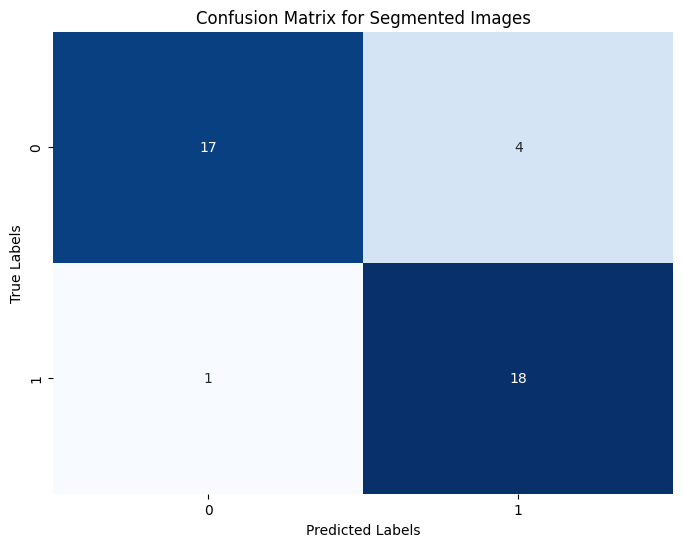

In [ ]:
# Evaluate performance on segmented images
loss_segmented, accuracy_segmented = model.evaluate(x_test_segmented, y_test_segmented)

# Predict labels for segmented images
y_pred_segmented = model.predict(x_test_segmented)
y_pred_segmented_binary = (y_pred_segmented > 0.5).astype(int)  # Convert probabilities to binary predictions

# Compute confusion matrix
conf_matrix_segmented = confusion_matrix(y_test_segmented, y_pred_segmented_binary)

# Compare performance
print(f"Performance on segmented images - Loss: {loss_segmented}, Accuracy: {accuracy_segmented}")
print("Confusion Matrix:")

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_segmented, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for Segmented Images")
plt.show()